### Realtime Object Detection

Detects objects in realtime video streaming via webcam

#### Import libraries for preprocessing and annotation

In [1]:
import numpy as np
import cv2
from pathlib import Path
from IPython.display import Image
import torch

#### Load pretrained models

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in C:\Users\BalajiMunusamy/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2021-10-25 torch 1.8.1+cpu CPU

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


#### Run object detection on example image

In [3]:
imgs = ['https://ultralytics.com/images/zidane.jpg']
Image(url=imgs[0])

In [4]:
results = model(imgs)
results.print()
results.save(".")

image 1/1: 720x1280 2 persons, 1 tie
Speed: 654.8ms pre-process, 156.0ms inference, 2.0ms NMS per image at shape (1, 3, 384, 640)
Saved 1 image to .


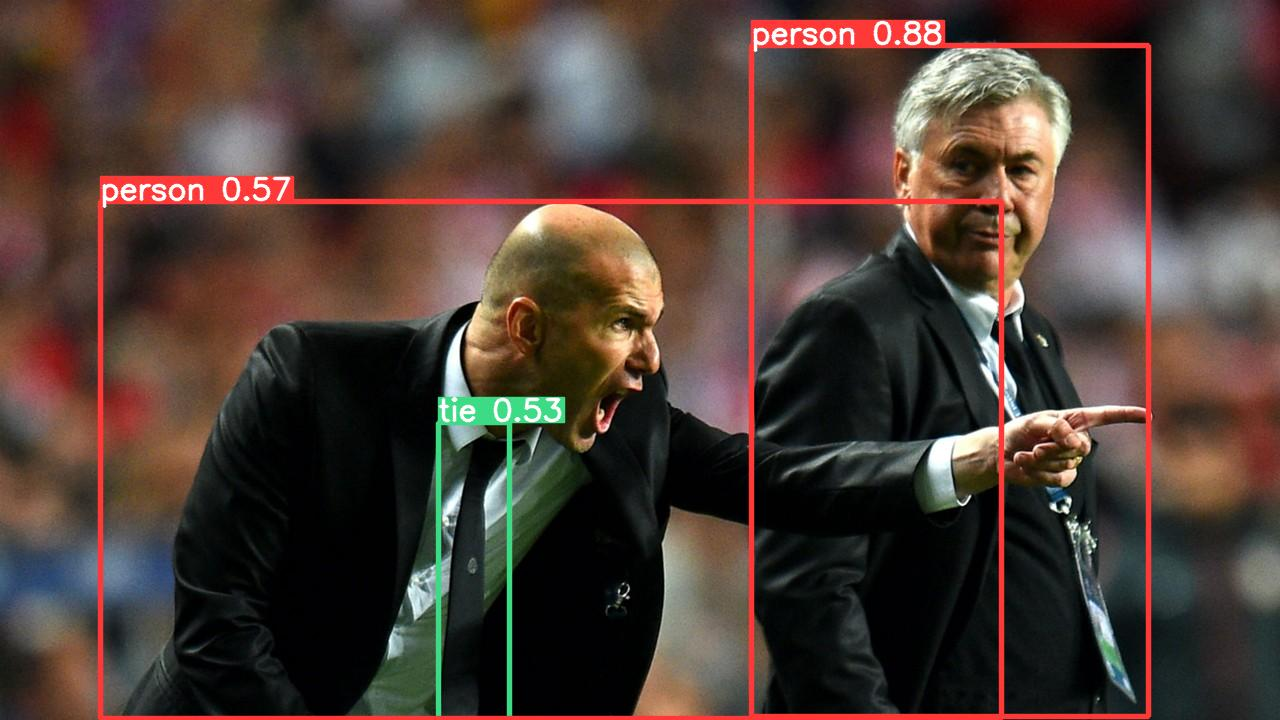

In [5]:
Image(filename='zidane.jpg') 

#### Run object detection on realtime video via webcam

In [7]:
print("Press q to exit the object detection window!")
cap = cv2.VideoCapture(0)
while True:
    ret, image_np = cap.read()
    results = model(image_np)
    df_result = results.pandas().xyxy[0]
    dict_result = df_result.to_dict()
    scores = list(dict_result["confidence"].values())
    labels = list(dict_result["name"].values())
    
    list_boxes = list()
    for dict_item in df_result.to_dict('records'):
        list_boxes.append(list(dict_item.values())[:4])
    count = 0
    
    for xmin, ymin, xmax, ymax in list_boxes:
        image_np = cv2.rectangle(image_np, pt1=(int(xmin),int(ymin)), pt2=(int(xmax),int(ymax)), \
                                 color=(255,0, 0), thickness=2)
        cv2.putText(image_np, f"{labels[count]}: {round(scores[count], 2)}", (int(xmin), int(ymin)-10), \
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
        count = count + 1
        
    cv2.imshow('Object Detector', image_np);
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        print("The window has been exited!")
        break

Press q to exit the object detection window!
The window has been exited!
